RESULTS: 4. GENE ESSENTIALITY ANALYSIS
Focus: Assess genes critical for optimization.

Key Points to Cover:
Essential genes for growth and biomass production.
Simulations to identify knockout effects.
Implications for metabolic engineering or biotechnology. 

In [3]:
import cobra
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
model = cobra.io.read_sbml_model("../model/Mouse-GEM.xml")

https://identifiers.org/taxonomy/ does not conform to 'http(s)://identifiers.org/collection/id' or'http(s)://identifiers.org/COLLECTION:id


In [5]:
#first ,we import the model again to make sure we start with a baseline model and store the baseline biomass)
model = cobra.io.read_sbml_model("../model/Mouse-GEM.xml")
default_solution = model.optimize()
default_biomass = default_solution.objective_value
default_biomass

https://identifiers.org/taxonomy/ does not conform to 'http(s)://identifiers.org/collection/id' or'http(s)://identifiers.org/COLLECTION:id


4.262827945443598

In [6]:
#Then we run single gene deletions
from cobra.flux_analysis import single_gene_deletion
gene_deletion_results = single_gene_deletion(model)
gene_deletion_results.head()


,ids,growth,status
0,{Slc31a1},4.262828,optimal
1,{Oca2},4.262828,optimal
2,{Pld1},4.262828,optimal
3,{Galnt17},4.262828,optimal
4,{Sirt3},4.262828,optimal


This are genes whose deletion affect affects biomass production

In [7]:
#postprocessing the results to identify essential genes
df = gene_deletion_results.copy() # copy to a new dataframe
df["growth"] = df["growth"] .round(5) # rounding growth values to avoid floating point issues
df = df[df['growth'] != round(default_biomass,5)] 
df



,ids,growth,status
21,{Tars1},0.00000,optimal
30,{Atp5f1c},3.65385,optimal
115,{Sdhc},3.65385,optimal
136,{Xpr1},3.65385,optimal
150,{Polr2l},0.00000,optimal
...,...,...,...
2759,{Rars1},0.00000,optimal
2773,{Polr2j},0.00000,optimal
2821,{Lias},0.00000,optimal
2831,{Sdhb},3.65385,optimal


This shown genes whos deletion reduced or abolish biomass production

Post-processing of single-gene deletion results identified 132 genes whose knockout altered biomass production in the Mouse-GEM model. A subset of these genes completely abolished growth, indicating that they are essential for biomass production. Other genes caused a partial reduction in growth, suggesting that they contribute to biomass synthesis but can be partially compensated by alternative pathways. This distribution highlights a small metabolic core required for growth embedded within a highly redundant mammalian metabolic network.
>Only a small fraction of genes are essential for biomass production in Mouse-GEM, reflecting a robust and highly redundant mammalian metabolic network.

Identification of essential genes has direct implications for metabolic engineering and biotechnology. Genes whose deletion abolished biomass production represent core metabolic functions that must be preserved for cell viability, whereas non-essential genes may be modified without compromising growth. This distinction is critical for guiding genetic interventions aimed at pathway optimisation or flux redirection. Furthermore, essential genes highlight potential metabolic vulnerabilities that may be relevant in biomedical or therapeutic contexts.

In [8]:
#SIMULATION to identify knockout effects.
# Annotate only essential genes
for gene_set in df["ids"].head(5):
    for gene_id in gene_set:
        gene = model.genes.get_by_id(gene_id)
        print(f"{gene.id}: {gene.name}")
        print(gene.annotation)


Tars1: 
{'sbo': 'SBO:0000243'}
Atp5f1c: 
{'sbo': 'SBO:0000243'}
Sdhc: 
{'sbo': 'SBO:0000243'}
Xpr1: 
{'sbo': 'SBO:0000243'}
Polr2l: 
{'sbo': 'SBO:0000243'}


Gene annotations in Mouse-GEM were limited to generic Systems Biology Ontology identifiers, and no detailed functional annotations were available within the model. Consequently, biological interpretation of essential genes was based on their impact on biomass production rather than on annotation metadata.

In [12]:
# Copy results
df = gene_deletion_results.copy()

# Round to avoid floating point issues
df["growth"] = df["growth"].round(5)
baseline_growth = round(default_biomass, 5)

# Classify genes
essential_genes = df[df["growth"] == 0]
partially_essential_genes = df[
    (df["growth"] > 0) & (df["growth"] < baseline_growth)
]

non_essential_genes = df[df["growth"] == baseline_growth]

print(f"Essential genes: {len(essential_genes)}")
print(f"Partially essential genes: {len(partially_essential_genes)}")
print(f"Non-essential genes: {len(non_essential_genes)}")


Essential genes: 95
Partially essential genes: 37
Non-essential genes: 2714


In this way we can see that only 95 genes are essential for biomass production

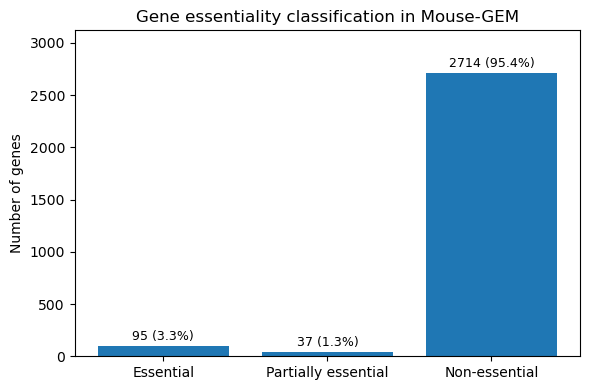

In [19]:
# Visualize the results
import pandas as pd
import matplotlib.pyplot as plt

# Counting genes in each category
counts = {
    "Essential": len(essential_genes),
    "Partially essential": len(partially_essential_genes),
    "Non-essential": len(non_essential_genes)
}

df_counts = pd.DataFrame.from_dict(
    counts, orient="index", columns=["Number of genes"]
)

# Calculating percentages
total_genes = df_counts["Number of genes"].sum()
df_counts["Percentage"] = 100 * df_counts["Number of genes"] / total_genes

# Plot
plt.figure(figsize=(6,4))
bars = plt.bar(df_counts.index, df_counts["Number of genes"])

plt.ylabel("Number of genes")
plt.title("Gene essentiality classification in Mouse-GEM")

# Increasing y-axis limit to avoid overlap
plt.ylim(0, df_counts["Number of genes"].max() * 1.15)

# Adding labels ABOVE bars (no overlap)
for bar, count, pct in zip(
    bars,
    df_counts["Number of genes"],
    df_counts["Percentage"]
):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + total_genes * 0.01,
        f"{count} ({pct:.1f}%)",
        ha="center",
        va="bottom",
        fontsize=9
    )

plt.tight_layout()
plt.show()
